<a href="https://colab.research.google.com/github/kushkad/womenclothproject/blob/main/womencloth.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Title of Project :**
**Women Cloth Reviews Prediction with Multi-Nomial Naive Bayes**



---



# **Objectives:**
**The objective of this project is to predict women's clothing reviews using a Multi-Nomial Naive Bayes model. The model aims to classify reviews based on their sentiment or other relevant criteria.**



# **Data Source:**
**The dataset used for this project is sourced from [GitHub](https://github.com/YBIFoundation/ProjectHub-MachineLearning/raw/main/Women%20Clothing%20E-Commerce%20Review.csv).**

# **Import** **Library**

In [31]:
import pandas as pd

In [32]:
import numpy as np

In [33]:
import matplotlib.pyplot as plt

In [34]:
import seaborn as sns

# **Import Data**

In [35]:
df = pd.read_csv("https://github.com/YBIFoundation/ProjectHub-MachineLearning/raw/main/Women%20Clothing%20E-Commerce%20Review.csv")

# **Describe Data**

In [36]:
df.head()

,Clothing ID,Age,Title,Review,Rating,Recommended,Positive Feedback,Division,Department,Category
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Clothing ID        23486 non-null  int64 
 1   Age                23486 non-null  int64 
 2   Title              19676 non-null  object
 3   Review             22641 non-null  object
 4   Rating             23486 non-null  int64 
 5   Recommended        23486 non-null  int64 
 6   Positive Feedback  23486 non-null  int64 
 7   Division           23472 non-null  object
 8   Department         23472 non-null  object
 9   Category           23472 non-null  object
dtypes: int64(5), object(5)
memory usage: 1.8+ MB


In [38]:
df.describe

<bound method NDFrame.describe of        Clothing ID  Age                                              Title  \
0              767   33                                                NaN   
1             1080   34                                                NaN   
2             1077   60                            Some major design flaws   
3             1049   50                                   My favorite buy!   
4              847   47                                   Flattering shirt   
...            ...  ...                                                ...   
23481         1104   34                     Great dress for many occasions   
23482          862   48                         Wish it was made of cotton   
23483         1104   31                              Cute, but see through   
23484         1084   28  Very cute dress, perfect for summer parties an...   
23485         1104   52                    Please make more like this one!   

                                                  Review  Rating  Recommended  \
0      Absolutely wonderful - silky and sexy and comf...       4            1   
1      Love this dress!  it's sooo pretty.  i happene...       5            1   
2      I had such high hopes for this dress and reall...       3            0   
3      I love, love, love this jumpsuit. it's fun, fl...       5            1   
4      This shirt is very flattering to all due to th...       5            1   
...                                                  ...     ...          ...   
23481  I was very happy to snag this dress at such a ...       5            1   
23482  It reminds me of maternity clothes. soft, stre...       3            1   
23483  This fit well, but the top was very see throug...       3            0   
23484  I bought this dress for a wedding i have this ...       3            1   
23485  This dress in a lovely platinum is feminine an...       5            1   

       Positive Feedback        Division Department   Category  
0                      0       Initmates   Intimate  Intimates  
1                      4         General    Dresses    Dresses  
2                      0         General    Dresses    Dresses  
3                      0  General Petite    Bottoms      Pants  
4                      6         General       Tops    Blouses  
...                  ...             ...        ...        ...  
23481                  0  General Petite    Dresses    Dresses  
23482                  0  General Petite       Tops      Knits  
23483                  1  General Petite    Dresses    Dresses  
23484                  2         General    Dresses    Dresses  
23485                 22  General Petite    Dresses    Dresses  

[23486 rows x 10 columns]>

In [39]:
df.shape

(23486, 10)

In [40]:
df.isna().sum()

,0
Clothing ID,0
Age,0
Title,3810
Review,845
Rating,0
Recommended,0
Positive Feedback,0
Division,14
Department,14
Category,14


In [41]:
df[df['Review']==""]= np.nan

In [42]:
df['Review'].fillna("No Review", inplace = True)

/tmp/ipython-input-3048210762.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Review'].fillna("No Review", inplace = True)


In [43]:
df.isna().sum()


,0
Clothing ID,0
Age,0
Title,3810
Review,0
Rating,0
Recommended,0
Positive Feedback,0
Division,14
Department,14
Category,14


In [44]:
df['Review']

,Review
0,Absolutely wonderful - silky and sexy and comf...
1,Love this dress! it's sooo pretty. i happene...
2,I had such high hopes for this dress and reall...
3,"I love, love, love this jumpsuit. it's fun, fl..."
4,This shirt is very flattering to all due to th...
...,...
23481,I was very happy to snag this dress at such a ...
23482,"It reminds me of maternity clothes. soft, stre..."
23483,"This fit well, but the top was very see throug..."
23484,I bought this dress for a wedding i have this ...


In [45]:
df.columns


Index(['Clothing ID', 'Age', 'Title', 'Review', 'Rating', 'Recommended',
       'Positive Feedback', 'Division', 'Department', 'Category'],
      dtype='object')

# **Data Visualization**

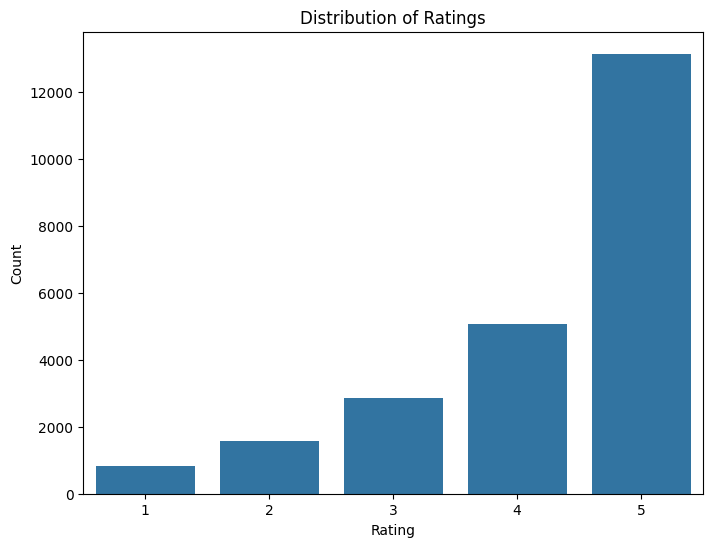

In [46]:
# Distribution of Ratings
plt.figure(figsize=(8, 6))
sns.countplot(x='Rating', data=df)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

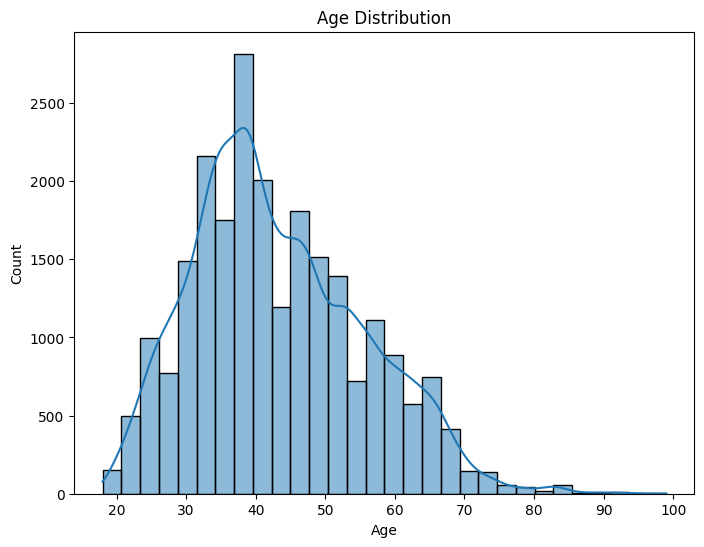

In [47]:
# Age Distribution
plt.figure(figsize=(8, 6))
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

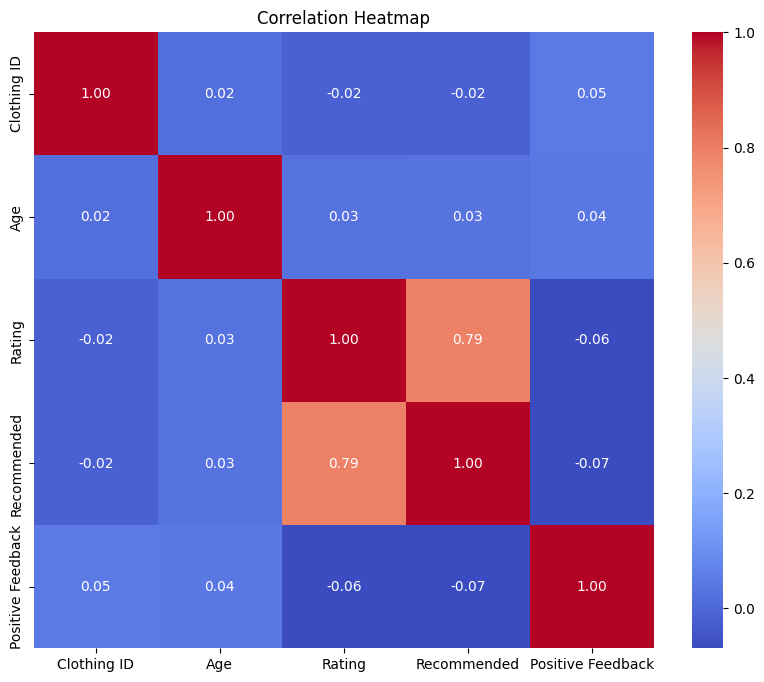

In [48]:
# Correlation Heatmap
plt.figure(figsize=(10, 8))
numeric_cols = df.select_dtypes(include=np.number) # Select only numeric columns
sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# **Data Preprocessing**

In [49]:
# Handle Missing Values
df['Title'].fillna("No Title", inplace=True)  # Fill missing titles with "No Title"
df['Review'].fillna("No Review", inplace=True)  # Fill missing reviews with "No Review"


/tmp/ipython-input-723559026.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Title'].fillna("No Title", inplace=True)  # Fill missing titles with "No Title"


In [50]:
#Drop rows with missing values in Division, Department, and Category
df.dropna(subset=['Division', 'Department', 'Category'], inplace=True)


# **Define Target Variable (y) and Feature Variables (X)**

In [51]:
y = df['Rating']

In [52]:
X = df['Review']

In [53]:
df['Rating'].value_counts()

,count
Rating,
5,13117
4,5077
3,2871
2,1565
1,842


# **Train Test Split**

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, stratify = y, random_state = 2529)

In [56]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((16430,), (7042,), (16430,), (7042,))

# **Modeling**

In [57]:
from sklearn.feature_extraction.text import CountVectorizer


In [58]:
cv = CountVectorizer(lowercase = True, analyzer = 'word', ngram_range=(2,3), stop_words = 'english', max_features=5000)

In [59]:
X_train  = cv.fit_transform(X_train)

In [60]:
cv.get_feature_names_out()

array(['0p fit', '10 12', '10 bought', ..., 'yellow color', 'yoga pants',
       'zipper little'], dtype=object)

In [61]:
X_train.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [62]:
X_test = cv.fit_transform(X_test)

In [63]:
cv.get_feature_names_out()

array(['10 12', '10 dress', '10 fit', ..., 'yes runs', 'yesterday love',
       'yoga pants'], dtype=object)

In [64]:
X_test.toarray()


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [65]:
from sklearn.naive_bayes import MultinomialNB

In [66]:
model = MultinomialNB()

In [67]:
model.fit(X_train, y_train)

MultinomialNB()

# **Model Evaluation**

In [68]:
y_pred = model.predict(X_test)

In [69]:
y_pred.shape

(7042,)

In [70]:
y_pred

array([3, 3, 1, ..., 4, 5, 5])

In [71]:
model.predict_proba(X_test)

array([[0.04672346, 0.06795573, 0.56560988, 0.2615919 , 0.05811903],
       [0.04357408, 0.13741923, 0.30450354, 0.24236301, 0.27214015],
       [0.56353586, 0.20679205, 0.14522967, 0.06077582, 0.0236666 ],
       ...,
       [0.24691055, 0.09508029, 0.18561952, 0.24966152, 0.22272812],
       [0.01795385, 0.01439584, 0.00685837, 0.03737753, 0.92341441],
       [0.1373234 , 0.06015356, 0.01166537, 0.01457541, 0.77628226]])

In [72]:
from sklearn.metrics import confusion_matrix, classification_report

In [73]:
print(confusion_matrix(y_test, y_pred))

[[  27   21   25   43  137]
 [  60   51   66   86  207]
 [ 124   86  124  142  385]
 [ 204  139  202  270  708]
 [ 430  304  399  617 2185]]


In [74]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.03      0.11      0.05       253
           2       0.08      0.11      0.10       470
           3       0.15      0.14      0.15       861
           4       0.23      0.18      0.20      1523
           5       0.60      0.56      0.58      3935

    accuracy                           0.38      7042
   macro avg       0.22      0.22      0.21      7042
weighted avg       0.41      0.38      0.39      7042



In [75]:
df['Rating'].value_counts()

,count
Rating,
5,13117
4,5077
3,2871
2,1565
1,842


In [76]:
df.replace({'Rating' : { 1:0, 2:0, 3:0, 4:1, 5:1}}, inplace = True)

In [77]:
y = df['Rating']

In [78]:
X = df['Review']

# **Prediction**

In [79]:
from sklearn.model_selection import train_test_split

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, stratify = y, random_state = 2529)

In [81]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((16430,), (7042,), (16430,), (7042,))

In [82]:
from sklearn.feature_extraction.text import CountVectorizer

In [83]:
cv = CountVectorizer(lowercase = True, analyzer = 'word', ngram_range=(2,3), stop_words = 'english', max_features=5000)

In [84]:
X_train  = cv.fit_transform(X_train)

In [85]:
X_test  = cv.fit_transform(X_test)

In [86]:
from sklearn.naive_bayes import MultinomialNB

In [87]:
model = MultinomialNB()


In [88]:
model.fit(X_train, y_train)

MultinomialNB()

In [89]:
from sklearn.metrics import confusion_matrix, classification_report

In [90]:
print(confusion_matrix(y_test, y_pred))

[[   0  188  132  181  257  825]
 [   0  657  469  635  901 2797]
 [   0    0    0    0    0    0]
 [   0    0    0    0    0    0]
 [   0    0    0    0    0    0]
 [   0    0    0    0    0    0]]


In [91]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1583
           1       0.78      0.12      0.21      5459
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0

    accuracy                           0.09      7042
   macro avg       0.13      0.02      0.03      7042
weighted avg       0.60      0.09      0.16      7042



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_

In [92]:
y_pred = model.predict(X_test)

In [93]:
y_pred.shape

(7042,)

In [94]:
y_pred

array([0, 1, 1, ..., 1, 1, 1])

# **Explarnation**
The Multinomial Naive Bayes model was trained on the training set and then applied to the test set for predictions. The evaluation metrics, including the confusion matrix and classification report, are generated to assess the model's performance.

**Confusion Matrix**:
The confusion matrix provides a breakdown of the predicted and actual values:

In the context of sentiment prediction:

**True Positive (TP)**: Reviews correctly predicted as positive.
True Negative (TN): Reviews correctly predicted as negative.
False Positive (FP): Negative reviews incorrectly predicted as positive.
False Negative (FN): Positive reviews incorrectly predicted as negative.
Classification Report:
The classification report includes precision, recall, and F1-score for each class, as well as the overall accuracy.

Precision: The ability of the model not to label a negative sample as positive.
Recall: The ability of the model to find all the positive samples.
F1-Score: The weighted average of precision and recall.
**Support:** The number of actual occurrences of the class in the specified dataset.
These metrics provide a comprehensive overview of the model's performance in predicting the sentiment of women's clothing reviews.